# Linear regression with SVD

Let $Ax = b$ be a linaer system of equations, where $A$ is an independent variable and $b$ is some observed variable.

We can estimate $x$ using SVD!

This works because...

$$

\tilde{x} = U^\intercal \Sigma^{-1}V \times b

$$

In [14]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams["font.family"] = "monospace"
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
%matplotlib inline

# linear mapping
from python.linear_mapping.map import regsvd
from python.linear_mapping.utils import fake_data

# Simulate some data

In [2]:
A,b,_W = fake_data(100, 50, s=1)

`fake_data()` returns the weight matrix used to artifically create the data. You can emperically compare it to the regression via SVD (`regsvd`) computes

# Compute least squares regression using singular value decomposition (SVD)

In [3]:
W = regsvd(A, b)

Notice how similar the weights are!

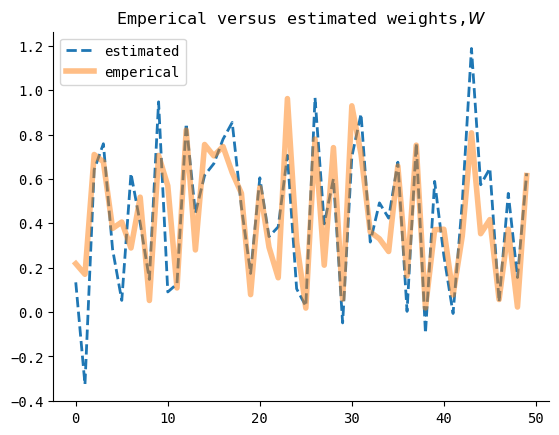

In [4]:
plt.plot(W, '--', label='estimated')
plt.plot(_W, label='emperical', lw=4, alpha=0.5)
plt.title('Emperical versus estimated weights,$W$')
plt.legend()
plt.show()

Let's look at this another way too

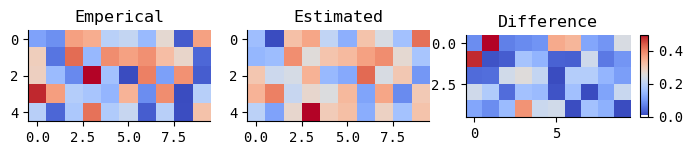

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 8))
im1 = ax1.imshow(_W.reshape(5,10), cmap='coolwarm')
ax1.set_title('Emperical')

im2 = ax2.imshow(W.reshape(5, 10), cmap='coolwarm')
ax2.set_title('Estimated')

im3 = ax3.imshow(abs(W.reshape(5, 10) - _W.reshape(5, 10)), cmap='coolwarm')
ax3.set_title('Difference')


divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im3, cax=cax)
cbar.set_ticks([0, 0.2, 0.4])

plt.show()

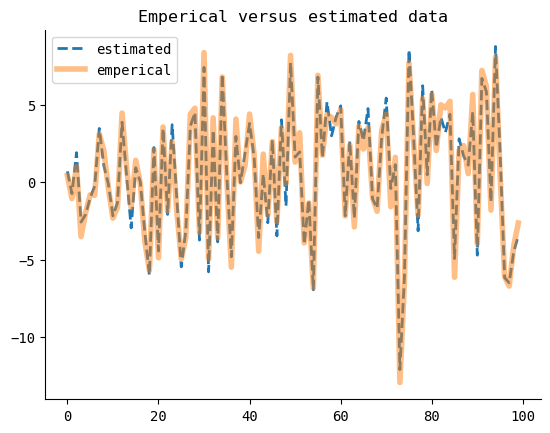

In [23]:
plt.plot(A@W, '--', label="estimated")
plt.plot(b, lw=4, alpha=0.5, label="emperical")
plt.title("Emperical versus estimated data")
plt.legend()
plt.show()